In [1]:
###########
### Error analysis 
###########


import pandas as pd 
import numpy as np 

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
testset = pd.read_csv('/content/drive/My Drive/Vaccine Capstone/Labelled Dataset/Datasets_XLNet/0402_Xtest_withhamming.csv', 
                      converters={'pred': eval, 'truth': eval})

In [0]:
validset = pd.read_csv('/content/drive/My Drive/Vaccine Capstone/Labelled Dataset/Datasets_XLNet/0402_Xvalid_withhamming.csv', 
                      converters={'pred': eval, 'truth': eval})

In [0]:
# Take out the survey responses that we got correct in the testset 
# Save out, and give to team to use in the bot demo 

testset[(testset['cluster_number'].isin([23,24,25])) & (testset['pred']==testset['truth'])].reset_index(drop=True).to_csv('/content/drive/My Drive/Vaccine Capstone/Labelled Dataset/Datasets_XLNet/TestsetSurvey_Correct.csv', index=False)

In [0]:
sub = testset[(testset['cluster_number'].isin([23,24,25])) & (testset['pred']==testset['truth'])].reset_index(drop=True)

In [0]:
sum_truth = [np.nansum(item) for item in sub['truth']]

In [0]:
sub['sum_truth']=sum_truth

In [0]:
sub[sub['sum_truth']>1]['tweet']

array(["I think for the most part vaccines are safe. They've helped to save a lot of people. On the other hand, though, I do think there are harmful side effects. I truly believe that some vaccines increase the risk of autism and other disorders in kids.",
       "I I'm on the border of whether vaccines are safe or not. I think that the idea of them is awesome and a great thing. However I think there are a lot of vaccines that maybe aren't necessary nowadays that everyone has to get. I don't think we know all of the risks with vaccines."],
      dtype=object)

In [0]:
validset[(validset['cluster_number'].isin([23,24,25])) & (validset['aug_data']==0) & (validset['truth']==validset['pred'])].reset_index(drop=True).to_csv('/content/drive/My Drive/Vaccine Capstone/Labelled Dataset/Datasets_XLNet/ValidationSetSurvey_Correct.csv', index=False)

In [0]:
#################
# Now to create chart to demonstrate distribution of hamming distances 
################# 

# np.nanmax(validset['hamming']) # 0.3 is the biggest hamming we see 
# technically, hamming is just the number of insertions you'd have to do / all labels 

# we can get the insertion distance by multiplying hamming calculation by 10 (number of labels )

validset['edit_dist'] = validset['hamming']*10
testset['edit_dist'] = testset['hamming']*10

In [0]:
# indicate how many labels are in truth, and how many labels are in 

truthcount = [np.nansum(x) for x in validset['truth']]
predcount = [np.nansum(x) for x in validset['pred']]
validset['truthcount'] = truthcount 
validset['predcount'] = predcount 


truthcount = [np.nansum(x) for x in testset['truth']] 
predcount = [np.nansum(x) for x in testset['pred']] 
testset['truthcount'] = truthcount 
testset['predcount'] = predcount

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
# stacked bar chart 
# I think we can do 1 version where truth = 0 labels, truth = 1 label, truth = 2 labels, truth = 3 labels 

In [0]:
def count_dist(df): 
  count_holder = []
  count_labels = [0,1,2,3] 
  for c in count_labels: 
    count_sub = len(df[df['truthcount']==c])
    count_holder.append(count_sub)
  return(count_holder)


In [0]:
count_dist(validset[validset['edit_dist']==0])

[305, 11400, 513, 41]

In [0]:
labels = ['labels_0', 'labels_1', 'labels_2', 'labels_3']

# count entire validation 
v_labels0 = count_dist(validset[validset['edit_dist']==0])
v_labels1 = count_dist(validset[validset['edit_dist']==1]) 
v_labels2 = count_dist(validset[validset['edit_dist']==2])
v_labels3 = count_dist(validset[validset['edit_dist']==3])

In [0]:
count_dist(validset[validset['edit_dist']==0])

[305, 11400, 513, 41]

In [0]:
v_labels0

[305, 11400, 513, 41]

In [0]:
v_labels1

[8, 95, 28, 6]

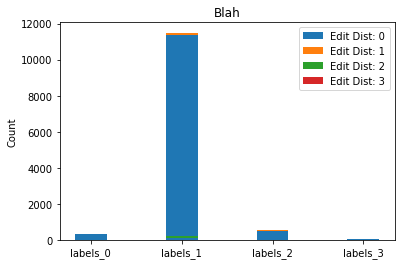

In [0]:
width = 0.35 
fig, ax = plt.subplots()

ax.bar(labels, v_labels0, width, label='Edit Dist: 0')
ax.bar(labels, v_labels1, width, bottom=v_labels0, label='Edit Dist: 1')
ax.bar(labels, v_labels2, width, bottom=v_labels1, label='Edit Dist: 2') 
ax.bar(labels, v_labels3, width, bottom=v_labels2, label='Edit Dist: 3') 

ax.set_ylabel('Count')
ax.set_title('Blah')
ax.legend()

plt.show() #hard to see with counts. 

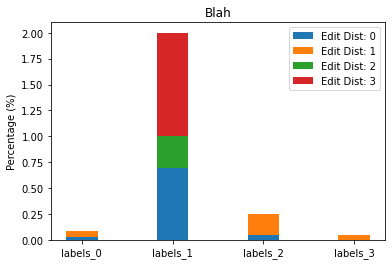

In [0]:
# how about we do this with percentage? 

labels = ['labels_0', 'labels_1', 'labels_2', 'labels_3']

# count entire validation 
v_labels0 = count_dist(validset)
pct_vlabels0 = [item/sum(v_labels0) for item in v_labels0]
v_labels1 = count_dist(validset[validset['edit_dist']==1]) 
pct_vlabels1 = [item/sum(v_labels1) for item in v_labels1]
v_labels2 = count_dist(validset[validset['edit_dist']==2])
pct_vlabels2 = [item/sum(v_labels2) for item in v_labels2]
v_labels3 = count_dist(validset[validset['edit_dist']==3])
pct_vlabels3 = [item/sum(v_labels3) for item in v_labels3]

width = 0.35 
fig, ax = plt.subplots()

ax.bar(labels, pct_vlabels0, width, label='Edit Dist: 0')
ax.bar(labels, pct_vlabels1, width, bottom=pct_vlabels0, label='Edit Dist: 1')
ax.bar(labels, pct_vlabels2, width, bottom=pct_vlabels1, label='Edit Dist: 2') 
ax.bar(labels, pct_vlabels3, width, bottom=pct_vlabels2, label='Edit Dist: 3') 

ax.set_ylabel('Percentage (%)')
ax.set_title('Blah')
ax.legend()

plt.show() # this is wrong...

In [0]:
valid_bardf = pd.concat([pd.Series(v_labels0), pd.Series(v_labels1), pd.Series(v_labels2), pd.Series(v_labels3)], axis=1)
valid_bardf.columns = ['edit0','edit1','edit2','edit3']

In [0]:
valid_bardf
# example: 
# row 0: true number of labels == 0 (313 total)

,edit0,edit1,edit2,edit3
0,305,8,0,0
1,11400,95,96,1
2,513,28,0,0
3,41,6,0,0


In [0]:
valid_bardf['total'] = valid_bardf.apply(lambda x: np.nansum(x), axis=1)

In [0]:
valid_bardf

,edit0,edit1,edit2,edit3,total
0,305,8,0,0,313
1,11400,95,96,1,11592
2,513,28,0,0,541
3,41,6,0,0,47


In [0]:
pct_vlabels0 = valid_bardf.loc[0,['edit0','edit1','edit2','edit3']]/valid_bardf['total'][0]
pct_vlabels1 = valid_bardf.loc[1,['edit0','edit1','edit2','edit3']]/valid_bardf['total'][1]
pct_vlabels2 = valid_bardf.loc[2,['edit0','edit1','edit2','edit3']]/valid_bardf['total'][2]
pct_vlabels3 = valid_bardf.loc[3,['edit0','edit1','edit2','edit3']]/valid_bardf['total'][3]

In [0]:
final = pd.concat([pd.Series(pct_vlabels0), pd.Series(pct_vlabels1), pd.Series(pct_vlabels2), pd.Series(pct_vlabels3)],axis=1)

In [0]:
final

,0,1,2,3
edit0,0.974441,0.983437,0.948244,0.87234
edit1,0.025559,0.008195,0.051756,0.12766
edit2,0.000000,0.008282,0.000000,0.00000
edit3,0.000000,0.000086,0.000000,0.00000


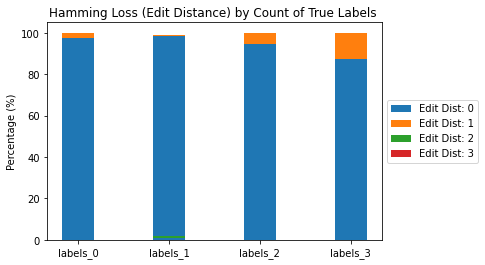

In [0]:
width = 0.35 
fig, ax = plt.subplots()

ax.bar(labels, final.loc['edit0',:]*100, width, label='Edit Dist: 0')
ax.bar(labels, final.loc['edit1',:]*100, width, bottom=final.loc['edit0',:]*100, label='Edit Dist: 1')
ax.bar(labels, final.loc['edit2',:]*100, width, bottom=final.loc['edit1',:]*100, label='Edit Dist: 2') 
ax.bar(labels, final.loc['edit3',:]*100, width, bottom=final.loc['edit2',:]*100, label='Edit Dist: 3') 

ax.set_ylabel('Percentage (%)')
ax.set_title('Hamming Loss (Edit Distance) by Count of True Labels ')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show() 

In [0]:
labels = ['labels_0', 'labels_1', 'labels_2', 'labels_3']

# count testset
v_labels0 = count_dist(testset[testset['edit_dist']==0])
v_labels1 = count_dist(testset[testset['edit_dist']==1]) 
v_labels2 = count_dist(testset[testset['edit_dist']==2])
v_labels3 = count_dist(testset[testset['edit_dist']==3])

test_bardf = pd.concat([pd.Series(v_labels0), pd.Series(v_labels1), pd.Series(v_labels2), pd.Series(v_labels3)], axis=1)
test_bardf.columns = ['edit0','edit1','edit2','edit3']

test_bardf['total'] = test_bardf.apply(lambda x: np.nansum(x), axis=1)

test_bardf

,edit0,edit1,edit2,edit3,total
0,4,2,0,0,6
1,412,12,17,0,441
2,2,15,1,1,19
3,0,1,0,0,1


In [0]:
pct_vlabels0 = test_bardf.loc[0,['edit0','edit1','edit2','edit3']]/test_bardf['total'][0]
pct_vlabels1 = test_bardf.loc[1,['edit0','edit1','edit2','edit3']]/test_bardf['total'][1]
pct_vlabels2 = test_bardf.loc[2,['edit0','edit1','edit2','edit3']]/test_bardf['total'][2]
pct_vlabels3 = test_bardf.loc[3,['edit0','edit1','edit2','edit3']]/test_bardf['total'][3]

testfinal = pd.concat([pd.Series(pct_vlabels0), pd.Series(pct_vlabels1), pd.Series(pct_vlabels2), pd.Series(pct_vlabels3)],axis=1)

testfinal

,0,1,2,3
edit0,0.666667,0.934240,0.105263,0.0
edit1,0.333333,0.027211,0.789474,1.0
edit2,0.000000,0.038549,0.052632,0.0
edit3,0.000000,0.000000,0.052632,0.0


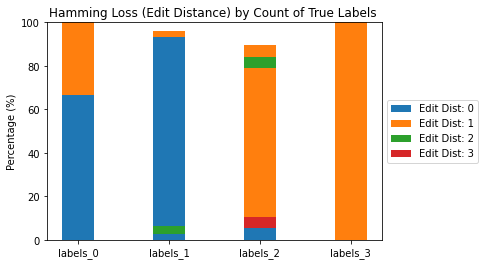

In [0]:
width = 0.35 
fig, ax = plt.subplots()

ax.bar(labels, testfinal.loc['edit0',:]*100, width, label='Edit Dist: 0')
ax.bar(labels, testfinal.loc['edit1',:]*100, width, bottom=testfinal.loc['edit0',:]*100, label='Edit Dist: 1')
ax.bar(labels, testfinal.loc['edit2',:]*100, width, bottom=testfinal.loc['edit1',:]*100, label='Edit Dist: 2') 
ax.bar(labels, testfinal.loc['edit3',:]*100, width, bottom=testfinal.loc['edit2',:]*100, label='Edit Dist: 3') 

ax.set_ylabel('Percentage (%)')
ax.set_title('Hamming Loss (Edit Distance) by Count of True Labels ')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show() 

In [0]:
len(testset[testset['truthcount']==0])

6

In [0]:
#len(testset[testset['truthcount']==1]) #441 
len(testset[(testset['truthcount']==2) & (testset['edit_dist']==0)])

2

In [0]:
len(testset[testset['truthcount']==2])

19

In [0]:
len(testset[testset['truthcount']==3])

1

In [0]:
len(testset)

467

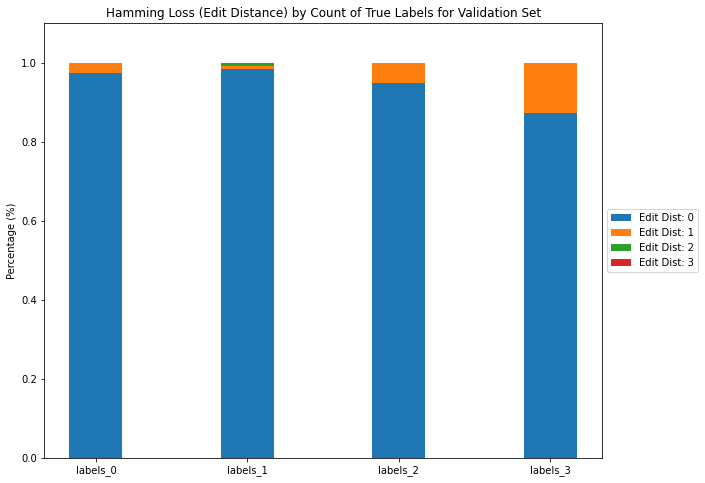

In [0]:
labels = ['labels_0', 'labels_1', 'labels_2', 'labels_3']

l0 = [0.97444089, 0.98343685, 0.94824399, 0.87234043]
l1 = [0.025559105, 0.008194307, 0.051756007, 0.127659574]
l2 = [0, 0.00828157, 0, 0]
l3 = [0, 0.000086266, 0, 0]

width = 0.35 
fig, ax = plt.subplots(figsize = (10,8))

ax.bar(labels, l0, width, label='Edit Dist: 0')
ax.bar(labels, l1, width, bottom=l0, label='Edit Dist: 1')
ax.bar(labels, l2, width, bottom=np.array(l0)+np.array(l1), label='Edit Dist: 2') 
ax.bar(labels, l3, width, bottom=np.array(l0)+np.array(l1)+np.array(l2), label='Edit Dist: 3') 

ax.set_ylim(0,1.1)
ax.set_ylabel('Percentage (%)')
ax.set_title('Hamming Loss (Edit Distance) by Count of True Labels for Validation Set')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show() 


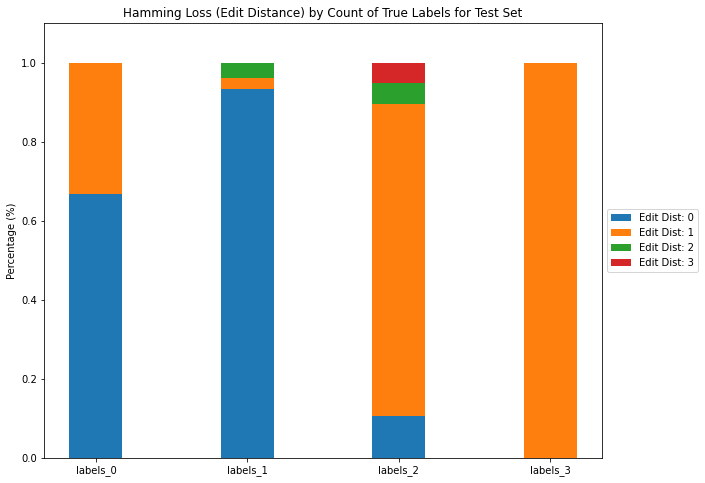

In [0]:
labels = ['labels_0', 'labels_1', 'labels_2', 'labels_3']

l0 = [0.6666667, 0.93424036, 0.10526316, 0]
l1 = [0.3333333, 0.02721088, 0.78947368, 1]
l2 = [0, 0.03854875, 0.05263158, 0]
l3 = [0, 0, 0.05263158 ,0]

width = 0.35 
fig, ax = plt.subplots(figsize = (10,8))

ax.bar(labels, l0, width, label='Edit Dist: 0')
ax.bar(labels, l1, width, bottom=l0, label='Edit Dist: 1')
ax.bar(labels, l2, width, bottom=np.array(l0)+np.array(l1), label='Edit Dist: 2') 
ax.bar(labels, l3, width, bottom=np.array(l0)+np.array(l1)+np.array(l2), label='Edit Dist: 3') 

ax.set_ylim(0,1.1)
ax.set_ylabel('Percentage (%)')
ax.set_title('Hamming Loss (Edit Distance) by Count of True Labels for Test Set')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show() 

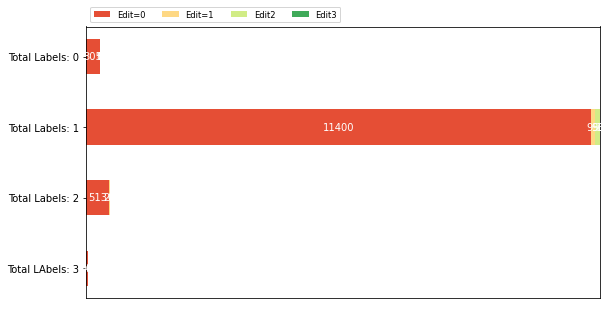

In [0]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Edit=0','Edit=1','Edit2','Edit3']
results = {
    'Total Labels: 0': [305, 8,0,0],
    'Total Labels: 1': [11400,95,96,1],
    'Total Labels: 2': [513,28,0,0],
    'Total LAbels: 3': [41,6,0,0],
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

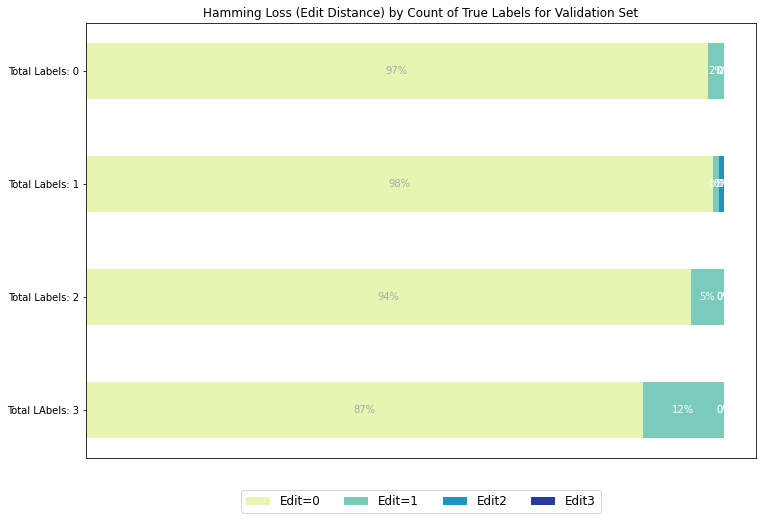

In [0]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Edit=0','Edit=1','Edit2','Edit3']
results = {
    'Total Labels: 0': [97.44, 2.56,0,0],
    'Total Labels: 1': [98.34,0.8195,0.828157,0.0086266],
    'Total Labels: 2': [94.824399,5.1756007,0,0],
    'Total LAbels: 3': [87.234,12.765,0,0],
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('YlGnBu')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12,8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, 105)

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c))+'%', ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.5, -0.1),
              loc='center', fontsize=12)
    ax.set_title('Hamming Loss (Edit Distance) by Count of True Labels for Validation Set')

    return fig, ax


survey(results, category_names)
plt.show()

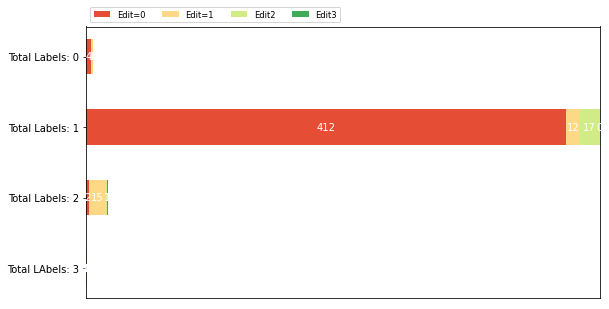

In [0]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Edit=0','Edit=1','Edit2','Edit3']
results = {
    'Total Labels: 0': [4,2,0,0],
    'Total Labels: 1': [412,12,17,0],
    'Total Labels: 2': [2,15,1,1],
    'Total LAbels: 3': [0,1,0,0],
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

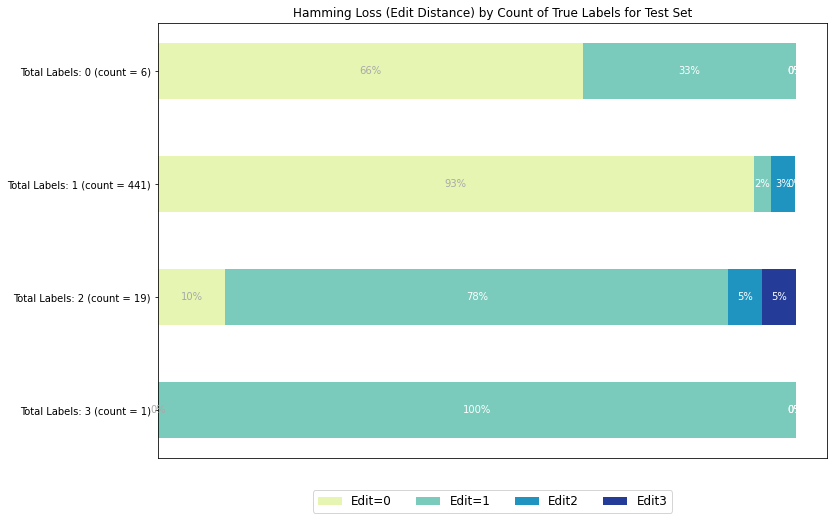

In [0]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Edit=0','Edit=1','Edit2','Edit3']
results = {
    'Total Labels: 0 (count = 6)': [66.67,33.33,0,0],
    'Total Labels: 1 (count = 441)': [93.42,2.72,3.85,0],
    'Total Labels: 2 (count = 19)': [10.53,78.95,5.26,5.26],
    'Total Labels: 3 (count = 1)': [0,100,0,0],
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('YlGnBu')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, 105)

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c))+'%', ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.5, -0.1),
              loc='center', fontsize=12)
    ax.set_title('Hamming Loss (Edit Distance) by Count of True Labels for Test Set')


    return fig, ax


survey(results, category_names)
plt.show()

In [11]:
len(testset[testset['edit_dist']==3])

1

In [15]:
len(validset[validset['edit_dist']==3])

1

In [18]:
validset[validset['edit_dist']==3]['tweet'].values

array(['So I have to get the flu shot today. I hate needles'],
      dtype=object)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


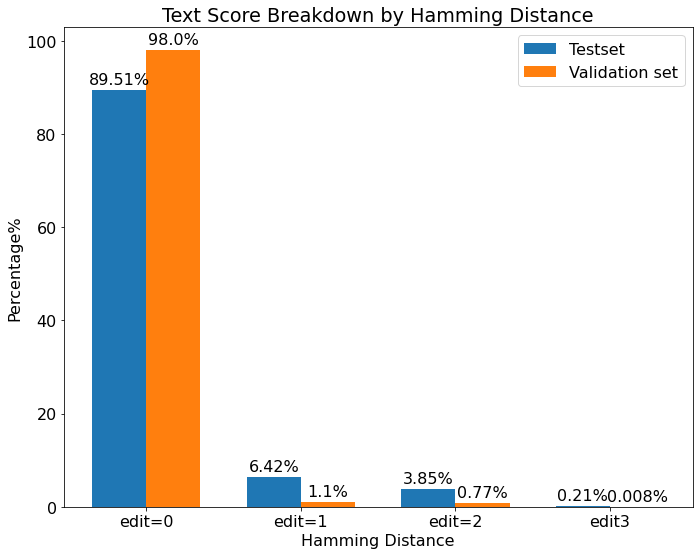

In [26]:
# make barchart of the percentages 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

labels = ['edit=0','edit=1','edit=2','edit3']
testset_pct = [89.51, 6.42, 3.85, 0.21]
validset_pct = [98, 1.1, 0.77, 0.008]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, testset_pct, width, label='Testset')
rects2 = ax.bar(x + width/2, validset_pct, width, label='Validation set')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage%')
ax.set_title('Text Score Breakdown by Hamming Distance')
ax.set_xlabel('Hamming Distance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()